In [1]:
import pandas as pd
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

import matplotlib.pyplot as plt

import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from johansen import Johansen
import itertools
import os

#%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
#               UTB,       TB,        U10y,      10y,       5y,        2y
bonds =        ['UB',      'ZB',      'TN',       'ZN',     'ZF',      'ZT']
tick_sizes =   [0.03125,   0.03125,   0.015625,   0.015625, 0.0078125, 0.0078125]
point_values = [1000,      1000,      1000,       1000,     1000,      2000]


In [3]:
train = pd.read_hdf('ALL.h5','table')

In [4]:
train.iloc[1370:1390]

,UB,ZB,TN,ZN,ZF,ZT
timestamp,,,,,,
2017-12-01 15:50:00-06:00,165.531250,151.296875,132.562500,123.492188,115.933594,106.828125
2017-12-01 15:51:00-06:00,165.515625,151.265625,132.562500,123.492188,115.933594,106.828125
2017-12-01 15:52:00-06:00,165.531250,151.296875,132.562500,123.507812,115.933594,106.828125
2017-12-01 15:53:00-06:00,165.531250,151.296875,132.562500,123.507812,115.933594,106.828125
2017-12-01 15:54:00-06:00,165.468750,151.265625,132.562500,123.492188,115.933594,106.828125
2017-12-01 15:55:00-06:00,165.468750,151.265625,132.546875,123.492188,115.933594,106.828125
2017-12-01 15:56:00-06:00,165.406250,151.234375,132.562500,123.492188,115.925781,106.828125
2017-12-01 15:57:00-06:00,165.453125,151.234375,132.562500,123.492188,115.933594,106.828125
2017-12-01 15:58:00-06:00,165.437500,151.265625,132.562500,123.492188,115.933594,106.828125


In [5]:
train[bonds]=train[bonds]*np.array(point_values)

In [6]:
from sklearn import linear_model

In [16]:
reg=linear_model.LinearRegression()
reg.fit(train[['UB','ZB','TN','ZN','ZF']].iloc[:20*1380],train['ZT'].iloc[:20*1380])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
reg.intercept_

120500.48477445773

In [18]:
reg.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': 1,
 'coef_': array([-0.03053976,  0.07289506, -0.31213368,  0.17342202,  0.92402161]),
 '_residues': 8382368.464803021,
 'rank_': 5,
 'singular_': array([313956.23995571,  43169.42770394,   8693.85475305,   4877.65607726,
          1821.89733832]),
 'intercept_': 120500.48477445773}

In [19]:
reg.coef_

array([-0.03053976,  0.07289506, -0.31213368,  0.17342202,  0.92402161])

In [20]:
from sklearn.feature_selection import f_regression

In [21]:
reg_1=f_regression(train[['UB','ZB','TN','ZN','ZF']].iloc[0:20*1380],train['ZT'].iloc[0:20*1380])

In [22]:
reg_1

(array([ 12780.58917273,  24097.28374541,  40222.02308617,  83544.5278842 ,
        265027.19797259]), array([0., 0., 0., 0., 0.]))

In [32]:
display(reg_1)

(array([ 12780.58917273,  24097.28374541,  40222.02308617,  83544.5278842 ,
        265027.19797259]), array([0., 0., 0., 0., 0.]))

In [23]:
type(reg.coef_)

numpy.ndarray

In [24]:
coint_vec=np.append(-reg.coef_,np.array([1]))

In [25]:
coint_vec

array([ 0.03053976, -0.07289506,  0.31213368, -0.17342202, -0.92402161,
        1.        ])

In [26]:
portfolio = (train*coint_vec).sum(axis=1)

In [27]:
pmean = portfolio[:1380*20].mean()
pstdev = portfolio[:1380*20].std()

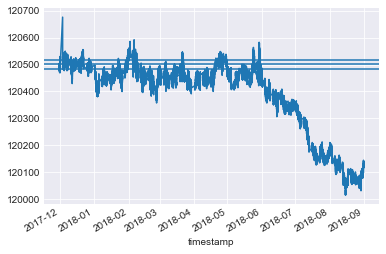

In [28]:
portfolio.plot()
plt.axhline(pmean)
plt.axhline(pmean+pstdev)
plt.axhline(pmean-pstdev)

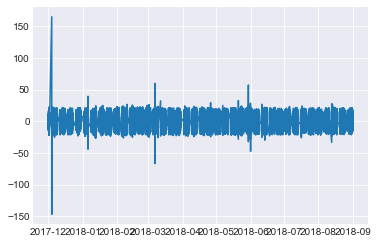

In [29]:
plt.plot(portfolio.diff().dropna())

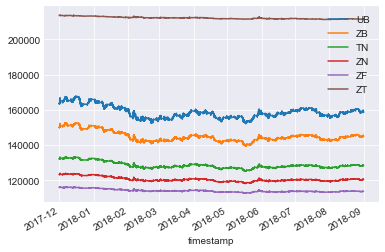

In [30]:
train.plot()

In [31]:
coint_another=fit(train.iloc[0:20*1380])

NameError: name 'fit' is not defined

In [34]:
train

,UB,ZB,TN,ZN,ZF,ZT
timestamp,,,,,,
2017-11-30 17:00:00-06:00,163406.250,149921.875,132000.0000,123179.6875,115847.65625,213640.6250
2017-11-30 17:01:00-06:00,163375.000,149921.875,132000.0000,123179.6875,115839.84375,213640.6250
2017-11-30 17:02:00-06:00,163406.250,149921.875,132000.0000,123179.6875,115839.84375,213625.0000
2017-11-30 17:03:00-06:00,163406.250,149921.875,132000.0000,123179.6875,115839.84375,213625.0000
2017-11-30 17:04:00-06:00,163406.250,149921.875,132000.0000,123179.6875,115839.84375,213625.0000
2017-11-30 17:05:00-06:00,163406.250,149921.875,132000.0000,123179.6875,115839.84375,213625.0000
2017-11-30 17:06:00-06:00,163406.250,149921.875,132000.0000,123179.6875,115839.84375,213625.0000
2017-11-30 17:07:00-06:00,163406.250,149921.875,132000.0000,123179.6875,115832.03125,213625.0000
2017-11-30 17:08:00-06:00,163375.000,149890.625,131984.3750,123164.0625,115832.03125,213625.0000


In [33]:
def fit(data):
    x = data.values
    x_centered = x - np.mean(x, axis=0)
    johansen = Johansen(x_centered, model=3, significance_level=0)
    eigenvectors, r = johansen.johansen()
    #print('rejected r values are: {}'.format(r))
    vec = eigenvectors[:, 0]
    #vec_max = np.max(np.abs(vec))
    vec_min = min(np.abs(vec))
    vec = vec / vec_min
    #print('The first cointegrating relation: {}'.format(vec))
    return vec    


In [35]:
coint_another=fit(train.iloc[0:20*1380])

In [36]:
coint_another

array([ -1.07675621,   1.59653967,   5.99281051, -13.01482361,
         7.55255591,  -1.        ])

In [37]:
portfolio_another=(train*coint_another).sum(axis=1)

In [38]:
p_mean = portfolio_another[:1380*20].mean()
p_stdev = portfolio_another[:1380*20].std()

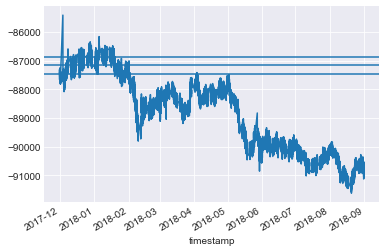

In [39]:
portfolio_another.plot()
plt.axhline(p_mean)
plt.axhline(p_mean+p_stdev)
plt.axhline(p_mean-p_stdev)

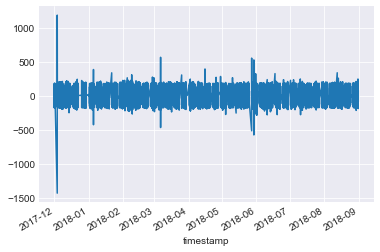

In [40]:
portfolio_another.diff().plot()

In [ ]:
adfuller(portfolio_another)

In [40]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(portfolio)